# Tâche 7

Ce notebook a pour but d'analyser la structure de bandes électroniques du Ca2NCl. Pour cela, dans ce notebook, il sera déterminer la bande interdite, la direction dans laquelle la dernière (première) bande de valence (conduction) présentant le plus et le moins de dispersion et enfin, il sera calculé la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction en supposant une dispersion parabolique.

# Extraction des informations

In [33]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [34]:
mp_key = "laRpenx9s6Ae6IiAe8AHZRRyzI5fduqF"
mp_id = "mp-22936"

In [35]:
with MPRester(mp_key) as m:
    el_bs = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Bande interdite 

{'direct': True, 'energy': 2.371, 'transition': 'F-F'}


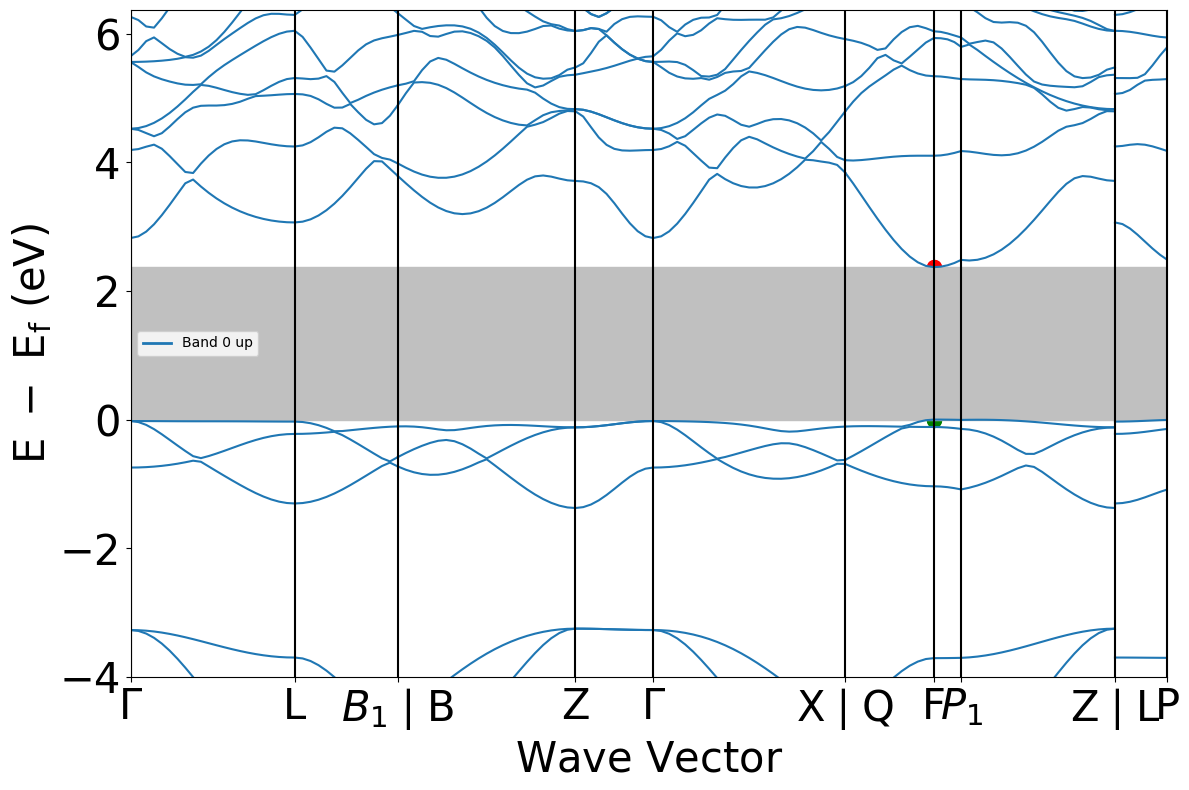

In [36]:
#Etape 1 : plot de la structure de bande électronique avec indication du minimum de la bande de conduction et du maximum  de la bande de valence 
plot = BSPlotter(el_bs)
plot.get_plot(vbm_cbm_marker=True)

#Etape 2 : mise en évidence de la bande interdite 
plot_data = BSPlotter(el_bs).bs_plot_data()
data = plot_data.get('ticks').get('distance')
gap = el_bs.get_band_gap()
print(gap)
gap_energy = el_bs.get_band_gap()['energy']
plt.fill_between(np.linspace(data[0], data[-1], 400), 0, gap_energy, color = 'silver')

### Observation

On peut observer que le minimum de la bande de conduction (point rouge sur le plot) et le maximum de la bande de valence (point bleu sur le plot) se produisent à la même valeur de vecteur d'onde. $\\\\$ La transition électronique se fait donc de F vers F dans l'espace réciproque. Il ne faut pas changer de vecteur d'onde. $\\\\$ L'énergie de la bande interdite est de 2.371 eV. Autrement dit, il faut fournir 2.371eV  d'énergie pour exciter un électrons de la bande de valence vers la bande de conduction. La valeur de 2.371 est une valeur caractéristique des semi-conducteurs.

## Direction de la dispersion des électrons

La dispersion représente la variation de l'énergie des électrons en fonction de leur vecteur d'onde. Les directions dans la première (dernière) bande de conduction (de valence) présentant le plus et le moins de dispersion peuvent être trouvés en cherchant la valeur absolue la moins (plus) élevée de la pente entre chaque point caractéristique de l'axe des vecteur d'onde. ($\Gamma$, L, B, Z, etc...). Au plus la pente est forte(en valeur absolue) entre deux points caractéristiques au plus la dispersion est grande. Au plus la pente est faible au moins la dispersion est importante. La pente est donc la différence d'énergie entre deux points particuliers divisés par la distance entre ces deux points. On fait ça entre chaque point particulier pour la première bande de conduction et la dernière bande de valence.

 La pente de la plus faible dispersion pour la bande de valence vaut:      0.008796108745269435 (flèche rouge)
La pente de la plus grande dispersion pour la bande de valence vaut:      0.2072741890854305 (flèche bleue)
La pente de la plus faible dispersion pour la bande de conduction vaut:   0.07058214006214206 (flèche verte)
La pente de la plus grande dispersion pour la bande de conduction vaut:   2.7196289569480365 (flèche jaune)


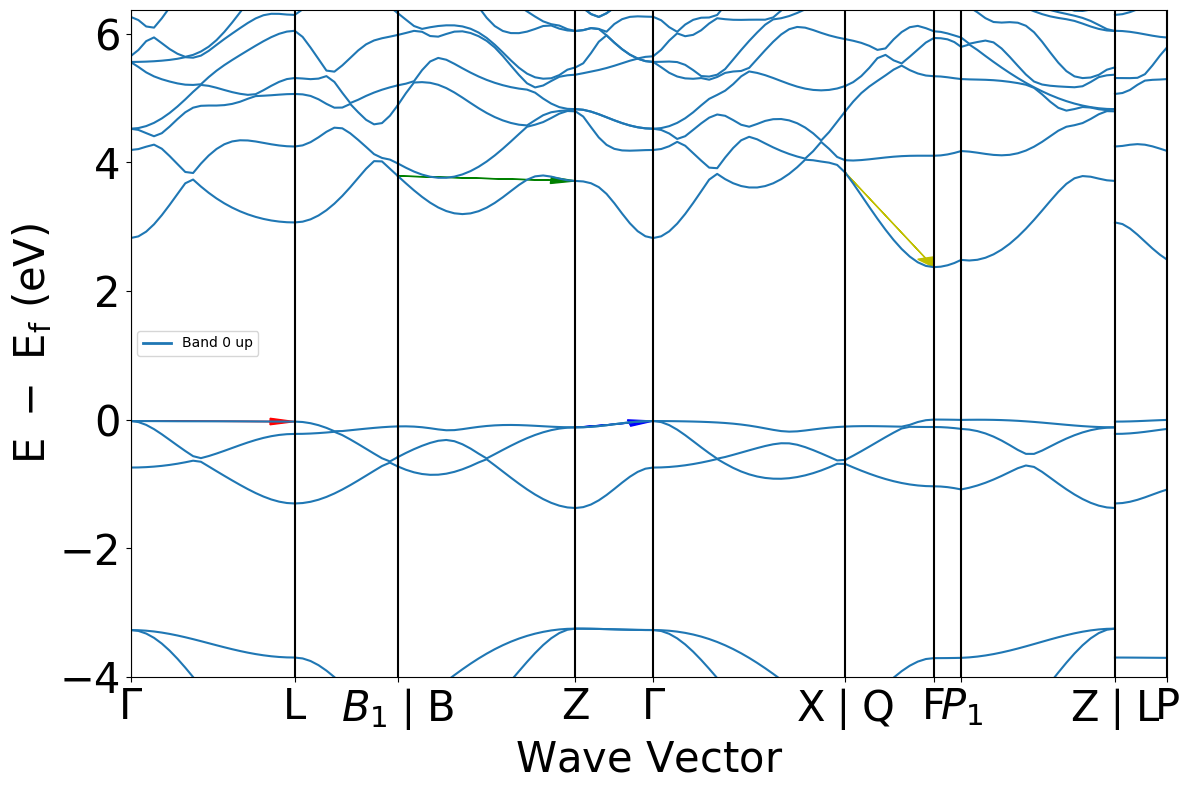

In [43]:
data = plot.bs_plot_data()
x = data.get('ticks').get('distance')

x_distance = np.array([x[0], x[1], x[3], x[4], x[6], x[8], x[9], x[11],x[13],x[14]]) 
y_energie = data.get('energy')
# je constate q'il y a 10 valeurs particulières de vecteurs d'onde (L, B, Z, etc...) non redondante => il y a donc 9 distances à calculer

nbr_iteration = len(x_distance)-1
dx = np.zeros(9)

for i in range(nbr_iteration) :
    dx[i] = x_distance[i+1] - x_distance[i]
    

#### -1 calcul pour la première bande de conduction ####
## via el_bs.get_cbm() je trouve que la première bande de conduction est la bande numéro 16
dy_energie_con = np.zeros(9)
pentedEdX_cond  = np.zeros(9)

for i in range(nbr_iteration) :
    dy_energie_con[i] = y_energie.get('1')[i][16][-1] - y_energie.get('1')[i][16][0]

for i in range(nbr_iteration) :
    pentedEdX_cond[i] = np.abs(dy_energie_con[i]/dx[i])
    
pmax_cond = np.max(pentedEdX_cond)
pmin_cond = np.min(pentedEdX_cond)
    
    
#### -2 calcul pour la dernière bande de valence ####
## via el_bs.get_cbm() je trouve que la dernière bande de valence est la bande numéro 15

dy_energie_val = np.zeros(9)
pentedEdX_val = np.zeros(9)

for i in range(nbr_iteration) :
    dy_energie_val[i] = y_energie.get('1')[i][15][-1] - y_energie.get('1')[i][15][0]

for i in range(nbr_iteration) :
    pentedEdX_val[i] = np.abs(dy_energie_val[i]/dx[i])
    
pmax_val = np.max(pentedEdX_val)
pmin_val = np.min(pentedEdX_val)
    

print(" La pente de la plus faible dispersion pour la bande de valence vaut:     ", pmin_val, "(flèche rouge)")

print("La pente de la plus grande dispersion pour la bande de valence vaut:     ", pmax_val, "(flèche bleue)")

print("La pente de la plus faible dispersion pour la bande de conduction vaut:  ", pmin_cond, "(flèche verte)")

print("La pente de la plus grande dispersion pour la bande de conduction vaut:  ", pmax_cond, "(flèche jaune)")



plot.get_plot()    
plt.arrow(x_distance[0], (y_energie.get('1')[0][15])[0], dx[0], dy_energie_val[0], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x_distance[3], (y_energie.get('1')[3][15])[0], dx[3], dy_energie_val[3], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x_distance[2], (y_energie.get('1')[2][16])[0], dx[2], dy_energie_con[2], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(x_distance[5], (y_energie.get('1')[5][16])[0], dx[5], dy_energie_con[5], color = 'y', head_width = 0.1,length_includes_head=True)
plt.show()

## Masse effective

La masse effective est une notion très utile pour décrire le comportement des porteurs de charges (comme les électrons). On les définit comme des particules ayant une masse effective (pouvant varier) au lieu de les considérer comme ayant une masse fixée évoluant dans un potentiel. La masse effective peut s'écrire en supposant une dispersion parabolique de la manière suivante : 
$m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}$

Elle dépend donc l'inverse des dérivées secondes de l'énergie par rapport au vecteur d'onde k. Dans le vide, la masse effective est égale à la masse 'réel'. Plus un électron a une masse effective importante au plus la courbure de la bande est petite. 

La masse effective pour la dernière bande de valence est égale à :  -2.908267355330431e-28 kg
La masse effective pour la première bande de conduction est égale à :  1.26791616260407e-28 kg


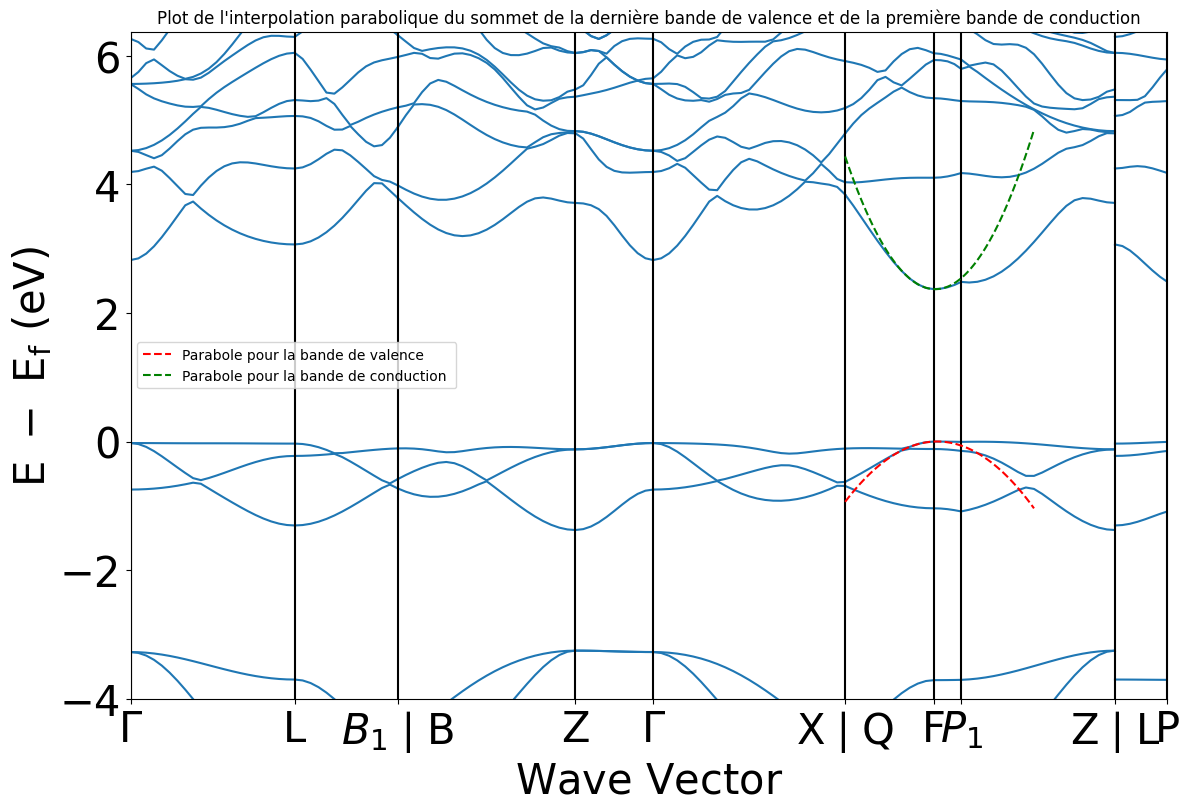

In [38]:
h_barre_carre = ((6.62607015*10**-34)/2*np.pi)**2
distance = data['distances']

#On réalise une interpolation pour cela, on a besoin de 3 points on trouve les trois points en prenant la valeur de la distance au niveau du vecteur d'onde caractéristique F où il y a le maximum de la bande de valence et le minimum de la bande de conduction
#Parmis tous les points contenus dans distance on en prend un avant et un après la distance du vecteur d'onde caractéristique F.

x = [distance[5][-4], distance[6][0], distance[6][1]]

### Pour la dernière bande de valence ###
# 1) on récupère les valeurs de l'énergie correspondant à ces distances
y_val = [y_energie.get('1')[5][15][-4], y_energie.get('1')[6][15][0], y_energie.get('1')[6][15][1]]

# 2) on réalise une interpolation avec ces 3 points pour obtenir une parabole
interpolation_val = np.polyfit(x,y_val,2)
 
# 3) calcul de la masse effective avec comme valeur 2a provenant de la parabole ax2 +bx +c car on prend la dérivée seconde
m1 = (h_barre_carre/(2*interpolation_val[0]))*((10**20)*1.60218*10**19) 
print("La masse effective pour la dernière bande de valence est égale à : ", m1, "kg")

#4) on plot sur un certain range peu importe tant qu'on voit bien la parabole et on calcul les valeurs de l'énergie correspondantes 
x_range = np.linspace(distance[4][-1], distance[7][-11], 100)  
y_fit = np.polyval(interpolation_val, x_range)



###Pour la première bande de conduction ###
#en suivant les mêmes étapes
y_cond = [y_energie.get('1')[5][16][-4], y_energie.get('1')[6][16][0], y_energie.get('1')[6][16][1]]
interpolation_cond = np.polyfit(x,y_cond,2)
m2 = (h_barre_carre/(2*interpolation_cond[0]))*((10**20)*1.60218*10**19) 
print("La masse effective pour la première bande de conduction est égale à : ", m2, "kg")
x_range2 = np.linspace(distance[4][-1], distance[7][-11], 100) 
y_fit2 = np.polyval(interpolation_cond, x_range2)

#5) plot des deux 
plot.get_plot()
plt.plot(x_range, y_fit, 'r--', label='Parabole pour la bande de valence ')
plt.plot(x_range2, y_fit2, 'g--', label='Parabole pour la bande de conduction ')
plt.legend()
plt.title("Plot de l'interpolation parabolique du sommet de la dernière bande de valence et de la première bande de conduction")
plt.show()


### Observation
On a bien une masse effective négative pour la parabole de la bande de valence ayant une courbure vers le bas et donc une dérivée seconde négative et une masse effective positive pour la parabole de la bande de conduction ayant une courbure vers le haut et donc une dérivée seconde positive. $\\\\$
On a bien que pour une masse effective (en valeur absolue) plus faible, la courbure est plus importante. 